# Spotify Analysis

https://medium.com/swlh/analysis-of-my-spotify-streaming-history-57a6088c3d3

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.graph_objects as go

In [37]:
# Import the data from a Json file

with open('StreamingHistory0.json', encoding='utf8') as f:
    data = json.load(f)

print(data[:5])

[{'endTime': '2020-06-10 16:56', 'artistName': 'Alphaville', 'trackName': 'Forever Young', 'msPlayed': 35538}, {'endTime': '2020-06-10 16:57', 'artistName': 'Pink Floyd', 'trackName': 'Time - 2011 Remastered Version', 'msPlayed': 15956}, {'endTime': '2020-06-10 16:57', 'artistName': 'Noir Désir', 'trackName': "L'homme pressé", 'msPlayed': 55692}, {'endTime': '2020-06-10 16:58', 'artistName': 'Pink Floyd', 'trackName': 'Shine On You Crazy Diamond, Pts. 6-9 - 2011 Remastered Version', 'msPlayed': 29094}, {'endTime': '2020-06-10 16:58', 'artistName': 'Pink Floyd', 'trackName': 'Shine On You Crazy Diamond, Pts. 1-5 - 2011 Remastered Version', 'msPlayed': 34683}]


In [38]:
# Convert from JSON to a data frame

history_1 = pd.DataFrame()

def extract_json_value(column_name):
    
    return [i[column_name] for i in data]

history_1['artist_name'] = extract_json_value('artistName')
history_1['end_time'] = extract_json_value('endTime')
history_1['ms_played'] = extract_json_value('msPlayed')
history_1['track_name'] = extract_json_value('trackName')

In [39]:
history_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  129 non-null    object
 1   end_time     129 non-null    object
 2   ms_played    129 non-null    int64 
 3   track_name   129 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.2+ KB


In [40]:
history = history_1

In [41]:
history

,artist_name,end_time,ms_played,track_name
0,Alphaville,2020-06-10 16:56,35538,Forever Young
1,Pink Floyd,2020-06-10 16:57,15956,Time - 2011 Remastered Version
2,Noir Désir,2020-06-10 16:57,55692,L'homme pressé
3,Pink Floyd,2020-06-10 16:58,29094,"Shine On You Crazy Diamond, Pts. 6-9 - 2011 Re..."
4,Pink Floyd,2020-06-10 16:58,34683,"Shine On You Crazy Diamond, Pts. 1-5 - 2011 Re..."
...,...,...,...,...
124,The Weeknd,2020-06-18 21:59,199847,Blinding Lights
125,Paul Kalkbrenner,2020-06-18 22:03,230083,Sky and Sand
126,De Palmas,2020-06-18 22:07,221593,Sur la route
127,Yves Jamait,2020-06-18 22:08,3111,"Ok, Tu T'en Vas"


In [42]:
#converting end_time to timestamp format
history['end_time'] = pd.to_datetime(history['end_time'])
history.head()

,artist_name,end_time,ms_played,track_name
0,Alphaville,2020-06-10 16:56:00,35538,Forever Young
1,Pink Floyd,2020-06-10 16:57:00,15956,Time - 2011 Remastered Version
2,Noir Désir,2020-06-10 16:57:00,55692,L'homme pressé
3,Pink Floyd,2020-06-10 16:58:00,29094,"Shine On You Crazy Diamond, Pts. 6-9 - 2011 Re..."
4,Pink Floyd,2020-06-10 16:58:00,34683,"Shine On You Crazy Diamond, Pts. 1-5 - 2011 Re..."


In [43]:
history['minutes_played'] = history.ms_played.divide(60000)
history.drop('ms_played', axis=1, inplace=True)
history.head()

,artist_name,end_time,track_name,minutes_played
0,Alphaville,2020-06-10 16:56:00,Forever Young,0.592300
1,Pink Floyd,2020-06-10 16:57:00,Time - 2011 Remastered Version,0.265933
2,Noir Désir,2020-06-10 16:57:00,L'homme pressé,0.928200
3,Pink Floyd,2020-06-10 16:58:00,"Shine On You Crazy Diamond, Pts. 6-9 - 2011 Re...",0.484900
4,Pink Floyd,2020-06-10 16:58:00,"Shine On You Crazy Diamond, Pts. 1-5 - 2011 Re...",0.578050


# Popularity of artist based on the number of times their songs were clicked and played

In [44]:

most_played_artists_by_count = history.groupby(by='artist_name')['track_name'].count().sort_values(ascending=False)[:15]

print('The most popular artists by number of times their songs were played were: \n\n{}'.format(most_played_artists_by_count))

The most popular artists by number of times their songs were played were: 

artist_name
The White Stripes           12
Bob Dylan                   10
Pink Floyd                   8
Queen                        5
Jack Johnson                 5
Red Hot Chili Peppers        4
The Dave Brubeck Quartet     4
Scorpions                    4
George Michael               3
Eagles                       3
Manau                        3
Maître Gims                  3
Daft Punk                    3
Francis Cabrel               3
Yves Jamait                  3
Name: track_name, dtype: int64


In [45]:
# Visualize the most popular artists with a standard bar chart

colors = ['RGB(103, 0, 31)','RGB(178, 24, 43)','RGB(214, 96, 77)','RGB(244, 165, 130)','RGB(253, 219, 199)',
          'RGB(247, 247, 247)','RGB(209, 229, 240)','RGB(146, 197, 222)','RGB(67, 147, 195)','RGB(33, 102, 172)',
          'RGB(5, 48, 97)']


layout = go.Layout(
    title='Popularity Of Artists By Number Of Times Their Song Was Played',
    yaxis= dict(
        title="Number of Times Played",
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
        titlefont=dict(size=15)),
    xaxis=dict(title="Artist Name"))


fig = go.Figure(data=[go.Bar(x=most_played_artists_by_count.index,
                             y=most_played_artists_by_count,
                             textposition='auto',
                             opacity=1,
                             marker_color=colors)])
fig.show()

# Popularity of artist based on the total amount of time spent listening to their songs

In [46]:
# Look at most popular artists by amount of time spent listening to their songs

amount_of_time = history.groupby(by='artist_name')['minutes_played'].sum().sort_values(ascending=False)[:15]

amount_of_time

artist_name
Pink Floyd                  28.580017
Scorpions                   19.293383
Bob Dylan                   13.570633
Jack Johnson                10.056383
Francis Cabrel               6.870533
The Dave Brubeck Quartet     6.565417
Guns N' Roses                5.994900
David Bowie                  5.942267
Eagles                       5.926667
Klingande                    5.926367
George Michael               5.758283
Ibrahim Maalouf              5.630850
Manau                        5.416717
Queen                        5.191583
Alphaville                   5.137600
Name: minutes_played, dtype: float64

In [47]:
colors = ['RGB(103, 0, 31)','RGB(178, 24, 43)','RGB(214, 96, 77)','RGB(244, 165, 130)','RGB(253, 219, 199)',
          'RGB(247, 247, 247)','RGB(209, 229, 240)','RGB(146, 197, 222)','RGB(67, 147, 195)','RGB(33, 102, 172)',
          'RGB(5, 48, 97)']

layout = go.Layout(
    title='Popularity of artists by amount of time spent listening to their song',
    yaxis= dict(
        title='Amount of time (in minutes)',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
        titlefont=dict(size=15)),
    xaxis= dict(
        title = 'Artist Name'))


fig = go.Figure(data=[go.Bar(x=amount_of_time.index,
                             y=amount_of_time,
                             opacity=1,
                            marker_color=colors)])

fig.show()


# Total amount of time spent listening to music each day

In [48]:
history['day'] = [d.date() for d in history['end_time']]
history['time'] = [d.time() for d in history['end_time']]
history.drop('end_time', axis=1, inplace=True)
history.head()

,artist_name,track_name,minutes_played,day,time
0,Alphaville,Forever Young,0.592300,2020-06-10,16:56:00
1,Pink Floyd,Time - 2011 Remastered Version,0.265933,2020-06-10,16:57:00
2,Noir Désir,L'homme pressé,0.928200,2020-06-10,16:57:00
3,Pink Floyd,"Shine On You Crazy Diamond, Pts. 6-9 - 2011 Re...",0.484900,2020-06-10,16:58:00
4,Pink Floyd,"Shine On You Crazy Diamond, Pts. 1-5 - 2011 Re...",0.578050,2020-06-10,16:58:00


In [49]:
day = history.groupby(by=['day'], as_index=False).sum()
day.head()

,day,minutes_played
0,2020-06-10,73.176183
1,2020-06-12,9.258683
2,2020-06-18,137.691250


In [50]:
fig = px.line(day, x="day", y="minutes_played",
              labels={
                     "day": "Month",
                     "minutes_played": "Minutes Played"},
              color_discrete_sequence=px.colors.sequential.RdBu, title="Timeline Of My Streaming History")

fig.show()

# Time spent listening on each day of the week

In [51]:
history_1.head()

,artist_name,track_name,minutes_played,day,time
0,Alphaville,Forever Young,0.592300,2020-06-10,16:56:00
1,Pink Floyd,Time - 2011 Remastered Version,0.265933,2020-06-10,16:57:00
2,Noir Désir,L'homme pressé,0.928200,2020-06-10,16:57:00
3,Pink Floyd,"Shine On You Crazy Diamond, Pts. 6-9 - 2011 Re...",0.484900,2020-06-10,16:58:00
4,Pink Floyd,"Shine On You Crazy Diamond, Pts. 1-5 - 2011 Re...",0.578050,2020-06-10,16:58:00


In [52]:
date = history_1
# date['minutes_played'] = date.ms_played.divide(60000)
# date.drop('ms_played', axis=1, inplace=True)

# date['day'] = pd.DatetimeIndex(date['end_time']).day_name()

date.head()

,artist_name,track_name,minutes_played,day,time
0,Alphaville,Forever Young,0.592300,2020-06-10,16:56:00
1,Pink Floyd,Time - 2011 Remastered Version,0.265933,2020-06-10,16:57:00
2,Noir Désir,L'homme pressé,0.928200,2020-06-10,16:57:00
3,Pink Floyd,"Shine On You Crazy Diamond, Pts. 6-9 - 2011 Re...",0.484900,2020-06-10,16:58:00
4,Pink Floyd,"Shine On You Crazy Diamond, Pts. 1-5 - 2011 Re...",0.578050,2020-06-10,16:58:00


In [53]:
date = date.groupby(by=['day'], as_index=False).sum()
date.head()

,day,minutes_played
0,2020-06-10,73.176183
1,2020-06-12,9.258683
2,2020-06-18,137.691250


In [54]:
fig = px.pie(date, names="day", values="minutes_played", color_discrete_sequence=px.colors.sequential.RdBu)

fig.show()

# Artist and their songs

In [55]:
artist = history_1
# artist['minutes_played'] = artist.ms_played.divide(60000)
# artist.drop('ms_played', axis=1, inplace=True)
# artist.drop('end_time', axis=1, inplace=True)

artist.head()

,artist_name,track_name,minutes_played,day,time
0,Alphaville,Forever Young,0.592300,2020-06-10,16:56:00
1,Pink Floyd,Time - 2011 Remastered Version,0.265933,2020-06-10,16:57:00
2,Noir Désir,L'homme pressé,0.928200,2020-06-10,16:57:00
3,Pink Floyd,"Shine On You Crazy Diamond, Pts. 6-9 - 2011 Re...",0.484900,2020-06-10,16:58:00
4,Pink Floyd,"Shine On You Crazy Diamond, Pts. 1-5 - 2011 Re...",0.578050,2020-06-10,16:58:00


In [56]:
artist_1 = artist.drop_duplicates(subset = ["track_name"])
artist_1.drop('minutes_played', axis=1, inplace=True)
artist_1

,artist_name,track_name,day,time
0,Alphaville,Forever Young,2020-06-10,16:56:00
1,Pink Floyd,Time - 2011 Remastered Version,2020-06-10,16:57:00
2,Noir Désir,L'homme pressé,2020-06-10,16:57:00
3,Pink Floyd,"Shine On You Crazy Diamond, Pts. 6-9 - 2011 Re...",2020-06-10,16:58:00
4,Pink Floyd,"Shine On You Crazy Diamond, Pts. 1-5 - 2011 Re...",2020-06-10,16:58:00
...,...,...,...,...
110,Imagine Dragons,Thunder,2020-06-18,20:48:00
114,Buffalo Springfield,For What It's Worth,2020-06-18,21:18:00
117,Ibrahim Maalouf,Una Rosa Blanca,2020-06-18,21:31:00
125,Paul Kalkbrenner,Sky and Sand,2020-06-18,22:03:00


In [57]:
artist_1 = artist_1.groupby(['artist_name'], as_index = False).count()

artist_1

,artist_name,track_name,day,time
0,Adam Levine,1,1,1
1,Alphaville,1,1,1
2,America,1,1,1
3,Audioslave,1,1,1
4,Bill Withers,1,1,1
5,Bob Dylan,3,3,3
6,Buffalo Springfield,1,1,1
7,Charles Aznavour,1,1,1
8,Chuck Berry,1,1,1
9,Cream,1,1,1


In [58]:
artist_1 = artist_1.rename(columns={"track_name": "unique_songs"})
artist_1.head()

,artist_name,unique_songs,day,time
0,Adam Levine,1,1,1
1,Alphaville,1,1,1
2,America,1,1,1
3,Audioslave,1,1,1
4,Bill Withers,1,1,1


In [59]:
time = artist.groupby(['artist_name'], as_index=False).sum()

time.head()

,artist_name,minutes_played
0,Adam Levine,0.661350
1,Alphaville,5.137600
2,America,4.741933
3,Audioslave,2.863283
4,Bill Withers,1.111700


In [60]:
top_artist = pd.merge(artist_1, time, on='artist_name')
top_artist = top_artist.sort_values(by='unique_songs', ascending=False).head(20)
top_artist

,artist_name,unique_songs,day,time,minutes_played
30,Pink Floyd,5,5,5,28.580017
5,Bob Dylan,3,3,3,13.570633
31,Queen,3,3,3,5.191583
21,Jack Johnson,3,3,3,10.056383
10,Daft Punk,3,3,3,2.790317
25,Maître Gims,2,2,2,4.618367
45,The White Stripes,2,2,2,4.747983
35,Scorpions,2,2,2,19.293383
14,Eagles,2,2,2,5.926667
15,Francis Cabrel,2,2,2,6.870533


In [61]:
fig = px.scatter(top_artist, x="artist_name", y="minutes_played", title='Total amount of time spent listening to each artist', size="unique_songs", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# Most listened to song

In [62]:
song = history_1
# song['minutes_played'] = song.ms_played.divide(60000)
# song.drop('ms_played', axis=1, inplace=True)
song

,artist_name,track_name,minutes_played,day,time
0,Alphaville,Forever Young,0.592300,2020-06-10,16:56:00
1,Pink Floyd,Time - 2011 Remastered Version,0.265933,2020-06-10,16:57:00
2,Noir Désir,L'homme pressé,0.928200,2020-06-10,16:57:00
3,Pink Floyd,"Shine On You Crazy Diamond, Pts. 6-9 - 2011 Re...",0.484900,2020-06-10,16:58:00
4,Pink Floyd,"Shine On You Crazy Diamond, Pts. 1-5 - 2011 Re...",0.578050,2020-06-10,16:58:00
...,...,...,...,...,...
124,The Weeknd,Blinding Lights,3.330783,2020-06-18,21:59:00
125,Paul Kalkbrenner,Sky and Sand,3.834717,2020-06-18,22:03:00
126,De Palmas,Sur la route,3.693217,2020-06-18,22:07:00
127,Yves Jamait,"Ok, Tu T'en Vas",0.051850,2020-06-18,22:08:00


In [63]:
song = song.groupby(['track_name'], as_index=False).sum()
song = song.sort_values(by='minutes_played', ascending=False)
song

,track_name,minutes_played
52,Still Loving You,14.146100
47,"Shine On You Crazy Diamond, Pts. 1-5 - 2011 Re...",14.096400
31,Knockin' On Heaven's Door,9.940667
21,Have A Cigar - 2011 Remastered Version,9.031833
58,The Times They Are A-Changin',8.853317
...,...,...
0,20th Century Fox Fanfare,0.126083
22,Hotel California - 2013 Remaster,0.098200
59,The Wind,0.074017
9,Breakfast In America - Remastered,0.069933


In [65]:
song_artist = history_1
# song_artist = song_artist.sort_values(by='track_name', ascending=False)
# song_artist.drop('end_time', axis=1, inplace=True)
# song_artist.drop('ms_played', axis=1, inplace=True)
song_artist.head(10)

,artist_name,track_name,minutes_played,day,time
0,Alphaville,Forever Young,0.592300,2020-06-10,16:56:00
1,Pink Floyd,Time - 2011 Remastered Version,0.265933,2020-06-10,16:57:00
2,Noir Désir,L'homme pressé,0.928200,2020-06-10,16:57:00
3,Pink Floyd,"Shine On You Crazy Diamond, Pts. 6-9 - 2011 Re...",0.484900,2020-06-10,16:58:00
4,Pink Floyd,"Shine On You Crazy Diamond, Pts. 1-5 - 2011 Re...",0.578050,2020-06-10,16:58:00
5,Pink Floyd,Have A Cigar - 2011 Remastered Version,5.128200,2020-06-10,17:03:00
6,Pink Floyd,Wish You Were Here - 2011 Remastered Version,3.653167,2020-06-10,17:07:00
7,Queen,Bohemian Rhapsody - 2011 Mix,0.329833,2020-06-10,17:08:00
8,PSY,Gangnam Style (강남스타일),0.648900,2020-06-10,17:08:00
9,Queen,I Want To Break Free,0.510833,2020-06-10,17:11:00


In [66]:
song_artist = song_artist.drop_duplicates(subset = ["track_name"])
song_artist

,artist_name,track_name,minutes_played,day,time
0,Alphaville,Forever Young,0.592300,2020-06-10,16:56:00
1,Pink Floyd,Time - 2011 Remastered Version,0.265933,2020-06-10,16:57:00
2,Noir Désir,L'homme pressé,0.928200,2020-06-10,16:57:00
3,Pink Floyd,"Shine On You Crazy Diamond, Pts. 6-9 - 2011 Re...",0.484900,2020-06-10,16:58:00
4,Pink Floyd,"Shine On You Crazy Diamond, Pts. 1-5 - 2011 Re...",0.578050,2020-06-10,16:58:00
...,...,...,...,...,...
110,Imagine Dragons,Thunder,3.118517,2020-06-18,20:48:00
114,Buffalo Springfield,For What It's Worth,2.560100,2020-06-18,21:18:00
117,Ibrahim Maalouf,Una Rosa Blanca,5.630850,2020-06-18,21:31:00
125,Paul Kalkbrenner,Sky and Sand,3.834717,2020-06-18,22:03:00


In [67]:
song = pd.merge(song_artist, song, on='track_name')
song = song.sort_values(by='minutes_played', ascending=False)
song

KeyError: 'minutes_played'

In [ ]:
song = song.sort_values(by='minutes_played', ascending=False).head(16)
song.reset_index(inplace = True, drop = True) 
song

In [ ]:
songs = song.drop(song.index[0])
songs

In [ ]:
fig = px.bar(songs, x="track_name", y="minutes_played", title = 'Most Listened To Songs', color = "artist_name", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# Top 50 Songs

In [68]:
top_50 = history_1
# top_50['minutes_played'] = top_50.ms_played.divide(60000)
# top_50.drop('ms_played', axis=1, inplace=True)
top_50

,artist_name,track_name,minutes_played,day,time
0,Alphaville,Forever Young,0.592300,2020-06-10,16:56:00
1,Pink Floyd,Time - 2011 Remastered Version,0.265933,2020-06-10,16:57:00
2,Noir Désir,L'homme pressé,0.928200,2020-06-10,16:57:00
3,Pink Floyd,"Shine On You Crazy Diamond, Pts. 6-9 - 2011 Re...",0.484900,2020-06-10,16:58:00
4,Pink Floyd,"Shine On You Crazy Diamond, Pts. 1-5 - 2011 Re...",0.578050,2020-06-10,16:58:00
...,...,...,...,...,...
124,The Weeknd,Blinding Lights,3.330783,2020-06-18,21:59:00
125,Paul Kalkbrenner,Sky and Sand,3.834717,2020-06-18,22:03:00
126,De Palmas,Sur la route,3.693217,2020-06-18,22:07:00
127,Yves Jamait,"Ok, Tu T'en Vas",0.051850,2020-06-18,22:08:00


In [69]:
top_50 = top_50.groupby(['track_name'], as_index=False).sum()
top_50 = top_50.sort_values(by='minutes_played', ascending=False).head(51)
top_50.reset_index(inplace = True, drop = True) 
top_50

,track_name,minutes_played
0,Still Loving You,14.146100
1,"Shine On You Crazy Diamond, Pts. 1-5 - 2011 Re...",14.096400
2,Knockin' On Heaven's Door,9.940667
3,Have A Cigar - 2011 Remastered Version,9.031833
4,The Times They Are A-Changin',8.853317
5,I'm Still Standing,8.059117
6,Take Five,6.565417
7,Faith,6.353133
8,Flake,6.281517
9,La corrida - Remastered,6.096150


In [70]:
top_50.drop(top_50.index[0])

,track_name,minutes_played
1,"Shine On You Crazy Diamond, Pts. 1-5 - 2011 Re...",14.096400
2,Knockin' On Heaven's Door,9.940667
3,Have A Cigar - 2011 Remastered Version,9.031833
4,The Times They Are A-Changin',8.853317
5,I'm Still Standing,8.059117
6,Take Five,6.565417
7,Faith,6.353133
8,Flake,6.281517
9,La corrida - Remastered,6.096150
10,Space Oddity - 2015 Remaster,5.942267


# Visualisation

acousticness - float - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 

danceability - float - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy - float - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

instrumentalness - float - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

liveness - float - Detects the presence of an audience in the recording.

loudness - float - The overall loudness of a track in decibels (dB). 

speechiness - float - Speechiness detects the presence of spoken words in a track.

valence - float - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 

tempo - float - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

mode - int - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

key - int - The estimated overall key of the track.

In [ ]:
my_songs = pd.read_csv("song.csv", encoding= 'unicode_escape')
my_songs.drop('Unnamed: 15', axis=1, inplace=True)
my_songs.drop('Unnamed: 14', axis=1, inplace=True)
my_songs.drop('Unnamed: 16', axis=1, inplace=True)
my_songs.head()

# Spider Graph Comparisson of top 5

In [ ]:
top_5 = my_songs.head(6)
top_5.drop('key', axis=1, inplace=True)
top_5.drop('mode', axis=1, inplace=True)
top_5.drop('instrumentalness', axis=1, inplace=True)
top_5.drop('liveness', axis=1, inplace=True)
top_5.drop('valence', axis=1, inplace=True)
top_5.drop('tempo', axis=1, inplace=True)
top_5.drop('duration_ms', axis=1, inplace=True)
top_5.drop('time_signature', axis=1, inplace=True)
top_5

In [ ]:
top_5.drop(top_5.index[0])

In [ ]:
import plotly.graph_objects as go

categories = ['danceability','energy',
              'loudness', 'speechiness', 'acousticness']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[0.764,0.320,-7.209,0.055,0.837],
      theta=categories, 
      fill='toself',
      name='Memories'
))

fig.add_trace(go.Scatterpolar(
      r=[0.695,0.762,-3.497,0.040,0.192],
      theta=categories,
      fill='toself',
      name='Circles'
))


fig.add_trace(go.Scatterpolar(
      r=[0.488,0.343,-8.985,0.044,0.556],
      theta=categories,
      fill='toself',
      name='Lose You To Love Me'
))

fig.update_layout(
    title = "Diversity in audio features of top 3 songs",
    polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-10, 1]
    )),
  showlegend=True)

fig.show()

In [ ]:
my_songs.mean(axis=0)
avg_my_songs = pd.DataFrame({"danceability":[0.622140], 
                             "energy":[0.593160],
                             "key":[5.940000],
                             "loudness":[-6.460500],
                             "mode":[0.800000],
                             "speechiness":[0.067240],
                             "acousticness":[0.359720],
                             "instrumentalness":[0.002873],
                             "liveness":[0.155520],
                             "valence":[0.454660],
                             "tempo":[116.117440],
                             "duration_ms":[252700.720000],
                             "time_signature":[3.920000]})
avg_my_songs

# Happy or Sad?

valence - float - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. The closer it is to 1, the more positive/happy

In [71]:
v = [0.448,0.575,0.553,0.098,0.201,0.673,0.246,0.419,0.604,0.417,0.864,0.168,0.471,0.223,0.678,0.424,0.446,0.355,0.244,0.376,0.534,0.38,0.394,0.569,0.569,0.422,0.746,0.538,0.661,0.443,0.441,0.913,0.345,0.545,0.292,0.75,0.286,0.671,0.374,0.289,0.678,0.37,0.334,0.619,0.131,0.276,0.341,0.417,0.515,0.407]
  
less_count, more_count, middle_count = 0, 0, 0
  
# iterating each number in list 
for num in v: 
      
    # checking condition 
    if num >= 0 and num <0.5: 
        less_count += 1
        
    elif num >=0.5 and num < 0.6:
        middle_count += 1
  
    else: 
        more_count += 1
          
print("Less than 0.5: ", less_count) 
print("More than 0.6: ", more_count)
print("Between 0.5 and 0.6: ", middle_count)

Less than 0.5:  31
More than 0.6:  11
Between 0.5 and 0.6:  8


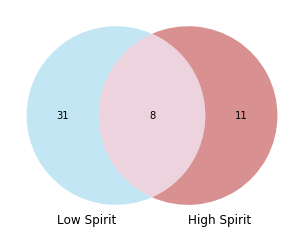

In [73]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

venn2_unweighted(subsets = (31, 11, 8), set_labels = ('Low Spirit', 'High Spirit'), set_colors=('skyblue', 'firebrick'), alpha = 0.5);

# Fast or Slow?

In [ ]:
fig = px.box(my_songs, y="tempo")
fig.show()

# World Wide

In [ ]:
ww = pd.read_csv('top50.csv', encoding= 'unicode_escape')
ww.drop('Unnamed: 0', axis=1, inplace=True)
ww.head()

In [ ]:
ww.mean(axis=0)
avg_ww = pd.DataFrame({"danceability":[71.38/100], 
                             "energy":[64.06/100],
                             "key":[5.940000],
                             "loudness":[-5.66],
                             "mode":[0.800000],
                             "speechiness":[12.48/100],
                             "acousticness":[22.16/100],
                             "instrumentalness":[0.002873],
                             "liveness":[14.66/100],
                             "valence":[54.60/100],
                             "tempo":[120.06],
                             "duration_ms":[252700.720000],
                             "time_signature":[3.920000]})

avg_ww.drop('duration_ms', axis=1, inplace=True)
avg_ww.drop('time_signature', axis=1, inplace=True)
avg_ww.drop('instrumentalness', axis=1, inplace=True)
avg_ww['Who'] = 'Everyone'

avg_ww


In [ ]:
avg_my_songs['Who'] = 'Me'
avg_my_songs

In [ ]:
average = avg_ww.append(avg_my_songs)
average

In [ ]:
average.to_excel('song12.xlsx', index=True)

In [ ]:
average_comp = pd.read_csv('song12.csv', encoding= 'unicode_escape')
average_comp.rename(columns = {"Unnamed: 0":"Feature"}, inplace = True)
average_comp

In [ ]:
average_compare = average_comp.drop(average_comp.index[9])
average_compare = average_compare.drop(average_compare.index[2])
compare_features = average_compare.drop(average_compare.index[2])
compare_features

In [ ]:

trace1=go.Bar(x=compare_features['Feature'],y=compare_features['Everyone'],marker=dict(color='firebrick',opacity=1),name="Everyone")
trace2=go.Bar(x=compare_features['Feature'],y=compare_features['Me'],marker=dict(color='darksalmon',opacity=1),name="Me")

data=[trace1,trace2]

layout = go.Layout(title="My Music Preferences VS The World's",xaxis=dict(title="Features"),
                   barmode="group")

fig = go.Figure(data,layout)

fig.show()


In [ ]:
loudness = pd.DataFrame({"Who":['Everyone', 'Me'],"Loudness":[-5.6600,-6.4605]})
loudness

In [ ]:
fig = px.bar(x=loudness['Who'], y=loudness['Loudness'],
              labels={"y": "Loudness Index",
                     "x": " "},
              color_discrete_sequence=px.colors.sequential.RdBu, title="Loudness Preference")

fig.show()

In [ ]:
tempo = pd.DataFrame({"Who":['Everyone', 'Me'],"Tempo":[120.06000,116.11744]})
tempo


In [ ]:
fig = px.bar(x=loudness['Who'], y=tempo['Tempo'],
              labels={"y": "Tempo Index",
                     "x": " "},
              color_discrete_sequence=px.colors.sequential.RdBu, title="Tempo Preference")

fig.show()